<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Outlier_Detection_Using_Percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outlier Detection Using Percentile :-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

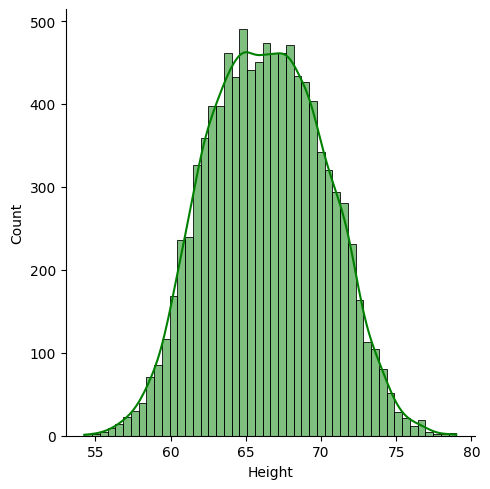

In [11]:
sns.displot(data=df,x='Height',kind='hist',color='green',kde=True)

<Axes: xlabel='Height'>

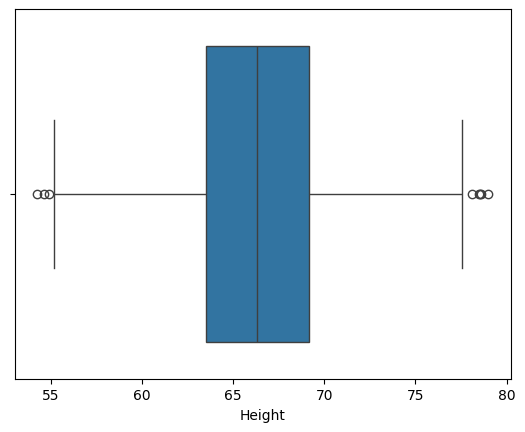

In [22]:
sns.boxplot(df['Height'],orient='h')

In [13]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [14]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [19]:
df[(df['Height'] > 74.78) | (df['Height'] < 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [20]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [21]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [23]:
df['Height'].describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<ipython-input-24-edc1cb406df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

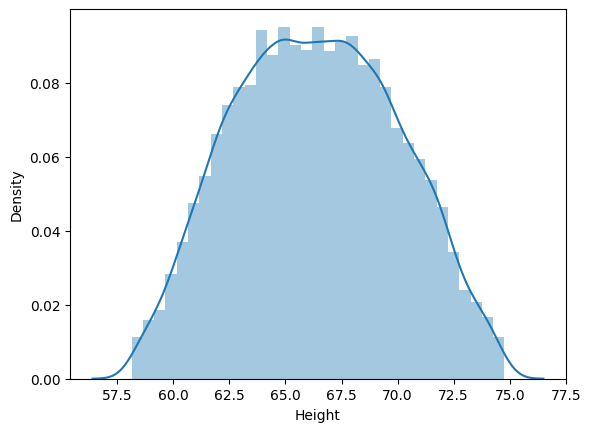

In [24]:
sns.distplot(new_df['Height'])

<Axes: xlabel='Height'>

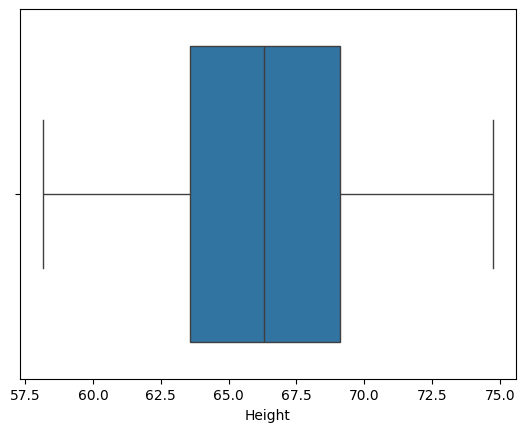

In [26]:
sns.boxplot(new_df['Height'],orient='h')

# Capping --> Winsorization

In [27]:
df['Height'] = np.where(df['Height'] >upper_limit,
        upper_limit,
        np.where(df['Height'] < lower_limit,
        lower_limit,
        df['Height']))

In [28]:
df.shape

(10000, 3)

In [29]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<ipython-input-30-3ba2185b6c3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

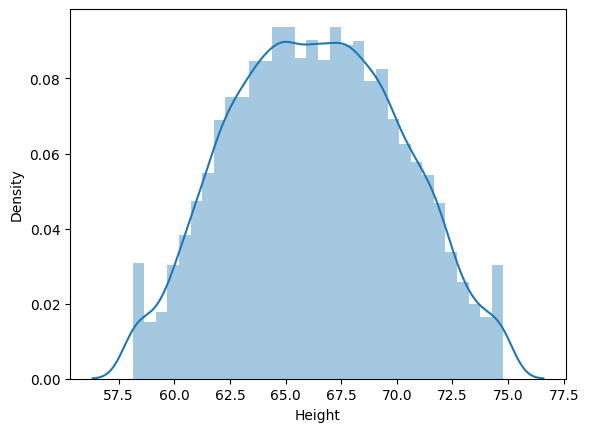

In [30]:
sns.distplot(df['Height'])

<Axes: xlabel='Height', ylabel='Count'>

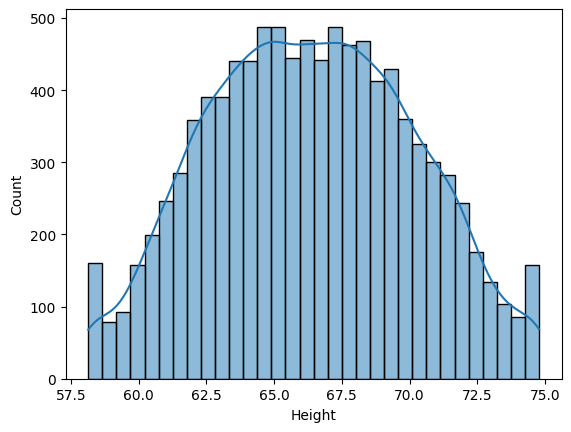

In [33]:
#now we shold use :
sns.histplot(data=df,x='Height' ,kde=True)

<Axes: xlabel='Height'>

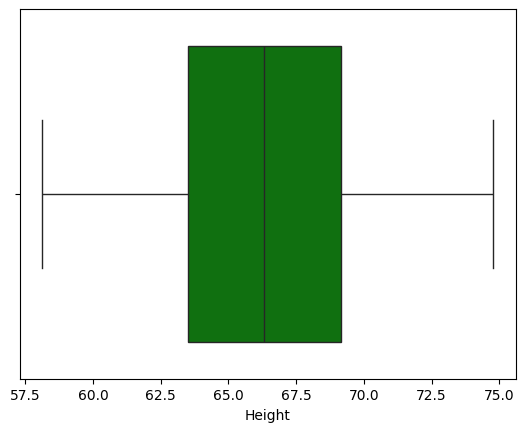

In [36]:
sns.boxplot(df['Height'],orient='h',color='green')